In [1]:
 from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Data Glacier/week8

/content/drive/My Drive/Data Glacier/week8


### Data tranformation

In [3]:
#we import our librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import spacy
import nltk
import collections
import  json
import spacy.cli

spacy.cli.download("en_core_web_lg")


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
lst_dics = []
with open('Resume.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )## print the first one      
lst_dics[0]

{'content': 'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\n

In [5]:
lst_dics[0]['annotation'][0]['points'][0]['start']

1749

In [6]:
#read the data with pandas
df = pd.read_json('Resume.json', lines=True)
df.head()

,content,annotation
0,Govardhana K\nSenior Software Engineer\n\nBeng...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli\nTest Analyst at Oracle, Hy...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria\nData Analyst Intern - Oracle ...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin\nAssociate Consultant - State ...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari\njava developer\n\nPune, Maha...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [7]:
#we remove the trailled \n in the firat column
df['content'] = df['content'].str.split('\n').str.join(' ')

In [8]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalu...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli Test Analyst at Oracle, Hyd...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern - Oracle R...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant - State S...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari java developer Pune, Maharas...","[{'label': ['Skills'], 'points': [{'start': 18..."


In [9]:
df['content'][2]

'Hartej Kathuria Data Analyst Intern - Oracle Retail  Bengaluru, Karnataka - Email me on Indeed: indeed.com/r/Hartej-Kathuria/04181c5962a4af19  Willing to relocate to: Delhi - Bangalore, Karnataka - Gurgaon, Haryana  WORK EXPERIENCE  Data Analyst Intern  Oracle Retail -  Bengaluru, Karnataka -  June 2017 to Present  Job Responsibilities: o As an intern part of the Global Retail Insights team at Oracle Retail, work involved creating a data oriented buisness case based using high level trends for various retailers using Excel and SQL. o Forecasting Sales with use of various statistical Modelling Methods using SQL and R o Market Basket Analysis using transactional data of retailers using SQL and R  EDUCATION  Statistics and Probability  Manipal University  May 2018  B. Tech in Electrical and Electronics in Embedded Systems  MIT, Manipal University  May 2016  SKILLS  Python (2 years), SQL. (1 year), NOSQL (1 year), R (2 years), Machine Learning (2 years)  PUBLICATIONS  Post-operative life 

In [10]:
#we loop over the second column to also remove the \n
for sub in df['annotation']:
  for line in sub:
    for elt in line['points']:
      elt['text'] = elt['text'].rsplit('\n')
      print(elt['text'])
   # print(line['points'])
  #print(sub[0]['points'][0]['text'])

['Oracle']
['Oracle']
['Oracle']
['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle', 'PL-SQL programming, Sales Force with APEX.', 'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,', 'PL/SQL Developer, WinSCP, Putty', 'Web Technologies: JavaScript, XML, HTML, Webservice', '', 'Operating Systems: Linux, Windows', 'Version control system SVN & Git-Hub', 'Databases: Oracle', 'Middleware: Web logic, OC4J', 'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']
['Oracle']
['APEX. (Less than 1 year), Data Structures (3 years), FLEXCUBE (5 years), Oracle (5 years),', 'Algorithms (3 years)', '']
['2012']
['Adithya Institute of Technology']
['B.E in Computer Science Engineering']
['2012']
['Oracle']
['Associate Consultant']
['Oracle']
['Staff Consultant']
['Oracle']
['Senior Consultant', '']
['Cloud Lending Solutions']
['Senior Software Engineer', '']
['Oracle']
['Oracle']
['Cloud Lending Solutions']
['indeed.com/r/Govardhana-K/', 'b2de315d95905b68', 

In [11]:
#sample
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': ['Oracle']}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': ['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle',
     'PL-SQL programming, Sales Force with APEX.',
     'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,',
     'PL/SQL Developer, WinSCP, Putty',
     'Web Technologies: JavaScript, XML, HTML, Webservice',
     '',
     'Operating Systems: Linux, Windows',
     'Version control system SVN & Git-Hub',
     'Databases: Oracle',
     'Middleware: Web logic, OC4J',
     'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': ['Or

In [12]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalu...,"[{'label': ['Companies worked at'], 'points': ..."
1,"Harini Komaravelli Test Analyst at Oracle, Hyd...","[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern - Oracle R...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant - State S...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,"Imgeeyaul Ansari java developer Pune, Maharas...","[{'label': ['Skills'], 'points': [{'start': 18..."


## Data cleaning

In [13]:
#text before cleaning
df['content'][0]

'Govardhana K Senior Software Engineer  Bengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/ b2de315d95905b68  Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month • Salesforce Developer Oracle 5 Years 2 Month • Core Java Developer Languages Core Java, Go Lang Oracle PL-SQL programming, Sales Force Developer with APEX.  Designations & Promotions  Willing to relocate: Anywhere  WORK EXPERIENCE  Senior Software Engineer  Cloud Lending Solutions -  Bangalore, Karnataka -  January 2018 to Present  Present  Senior Consultant  Oracle -  Bangalore, Karnataka -  November 2016 to December 2017  Staff Consultant  Oracle -  Bangalore, Karnataka -  January 2014 to October 2016  Associate Consultant  Oracle -  Bangalore, Karnataka -  November 2012 to December 2013  EDUCATION  B.E in Computer Science Engineering  Adithya Institute of Technology -  Tamil Nadu  September 2008 to June 2012  https://www.indeed.com/r/Govardhana-K/b2de315d95905b68?isid=rex-d

In [14]:
#function to clean the column 'content'
def contentClean(x):
  pattern = re.compile(r"https?://\S+|www\.\S+")
  y = re.findall(pattern, x)
  x = re.sub(pattern, "", x) # removing url
  x = re.sub(r"#\S+", "",x) # removing hashtag
  x = re.sub(r"\n", "",x) # removing \n
  x = re.sub("[^a-zA-Z0-9 ]+", "", x) # removing special characters
  x = re.sub('\s+',' ',x) # removing extra space
  x = re.sub("[\w\.-]+@[\w\.-]+\.\w+", "", x) 
  return x


In [15]:
df['content'] = df['content'].apply(lambda x: contentClean(x))

In [16]:
#text aftern cleaning
df['content'][0]

'Govardhana K Senior Software Engineer Bengaluru Karnataka Karnataka Email me on Indeed indeedcomrGovardhanaK b2de315d95905b68 Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month Salesforce Developer Oracle 5 Years 2 Month Core Java Developer Languages Core Java Go Lang Oracle PLSQL programming Sales Force Developer with APEX Designations Promotions Willing to relocate Anywhere WORK EXPERIENCE Senior Software Engineer Cloud Lending Solutions Bangalore Karnataka January 2018 to Present Present Senior Consultant Oracle Bangalore Karnataka November 2016 to December 2017 Staff Consultant Oracle Bangalore Karnataka January 2014 to October 2016 Associate Consultant Oracle Bangalore Karnataka November 2012 to December 2013 EDUCATION BE in Computer Science Engineering Adithya Institute of Technology Tamil Nadu September 2008 to June 2012 SKILLS APEX Less than 1 year Data Structures 3 years FLEXCUBE 5 years Oracle 5 years Algorithms 3 years LINKS ADDITIONAL INFORMATION Tech

In [17]:
df.head()

,content,annotation
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ..."
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ..."
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22..."
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46..."
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18..."


In [18]:
#annotation before cleaning
df['annotation'][0]

[{'label': ['Companies worked at'],
  'points': [{'start': 1749, 'end': 1754, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1696, 'end': 1701, 'text': ['Oracle']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1417, 'end': 1422, 'text': ['Oracle']}]},
 {'label': ['Skills'],
  'points': [{'start': 1356,
    'end': 1792,
    'text': ['Languages: Core Java, Go Lang, Data Structures & Algorithms, Oracle',
     'PL-SQL programming, Sales Force with APEX.',
     'Tools: RADTool, Jdeveloper, NetBeans, Eclipse, SQL developer,',
     'PL/SQL Developer, WinSCP, Putty',
     'Web Technologies: JavaScript, XML, HTML, Webservice',
     '',
     'Operating Systems: Linux, Windows',
     'Version control system SVN & Git-Hub',
     'Databases: Oracle',
     'Middleware: Web logic, OC4J',
     'Product FLEXCUBE: Oracle FLEXCUBE Versions 10.x, 11.x and 12.x']}]},
 {'label': ['Companies worked at'],
  'points': [{'start': 1209, 'end': 1214, 'text': ['Or

## Featurization

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')

'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [21]:
#we create a list of generic stop words for the English vocabulary
nltk.download('stopwords')
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
#we create the column text clean containing the cleaned text
df["text_clean"] = df["content"].apply(lambda x: preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))

In [23]:
df.head()

,content,annotation,text_clean
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...


In [24]:
print(df["content"].iloc[0], " --> ", df["text_clean"].iloc[0])

Govardhana K Senior Software Engineer Bengaluru Karnataka Karnataka Email me on Indeed indeedcomrGovardhanaK b2de315d95905b68 Total IT experience 5 Years 6 Months Cloud Lending Solutions INC 4 Month Salesforce Developer Oracle 5 Years 2 Month Core Java Developer Languages Core Java Go Lang Oracle PLSQL programming Sales Force Developer with APEX Designations Promotions Willing to relocate Anywhere WORK EXPERIENCE Senior Software Engineer Cloud Lending Solutions Bangalore Karnataka January 2018 to Present Present Senior Consultant Oracle Bangalore Karnataka November 2016 to December 2017 Staff Consultant Oracle Bangalore Karnataka January 2014 to October 2016 Associate Consultant Oracle Bangalore Karnataka November 2012 to December 2013 EDUCATION BE in Computer Science Engineering Adithya Institute of Technology Tamil Nadu September 2008 to June 2012 SKILLS APEX Less than 1 year Data Structures 3 years FLEXCUBE 5 years Oracle 5 years Algorithms 3 years LINKS ADDITIONAL INFORMATION Techn

In [25]:
#apply NER on our text
## call model
ner = spacy.load("en_core_web_lg")## tag text
txt = df["text_clean"].iloc[3]
doc = ner(txt)## display result
spacy.displacy.render(doc, style="ent", jupyter=True)

In [26]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [27]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [28]:
spacy.explain("GPE")

'Countries, cities, states'

In [31]:
spacy.explain("PRODUCT")

'Objects, vehicles, foods, etc. (not services)'

In [32]:

spacy.explain("PRODUCT")

'Objects, vehicles, foods, etc. (not services)'

In [26]:
#Lets write a function that will put all the recognized entites into a new column and create a neaw column that will count the number of found entites


## tag text and exctract tags into a list
df["tags"] = df["content"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count

## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0


## extract features
tags_set = []
for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))


In [27]:
df.head()

,content,annotation,text_clean,tags,tags_DATE,tags_LOC,tags_ORG,tags_PERSON,tags_FAC,tags_TIME,...,tags_MONEY,tags_WORK_OF_ART,tags_PRODUCT,tags_QUANTITY,tags_ORDINAL,tags_LAW,tags_CARDINAL,tags_LANGUAGE,tags_NORP,tags_EVENT
0,Govardhana K Senior Software Engineer Bengalur...,"[{'label': ['Companies worked at'], 'points': ...",govardhana k senior software engineer bengalur...,"[{('Karnataka', 'GPE'): 2}, {('Oracle', 'GPE')...",14,1,9,6,0,0,...,0,0,2,0,0,0,2,0,0,0
1,Harini Komaravelli Test Analyst at Oracle Hyde...,"[{'label': ['Companies worked at'], 'points': ...",harini komaravelli test analyst oracle hyderab...,"[{('Hyderabad', 'GPE'): 4}, {('QTP', 'ORG'): 3...",4,0,33,6,0,0,...,0,0,3,1,0,0,2,0,0,0
2,Hartej Kathuria Data Analyst Intern Oracle Ret...,"[{'label': ['Skills'], 'points': [{'start': 22...",hartej kathuria data analyst intern oracle ret...,"[{('Oracle Retail', 'ORG'): 3}, {('2 years', '...",10,0,10,1,0,0,...,0,1,1,0,0,0,7,0,0,0
3,Ijas Nizamuddin Associate Consultant State Str...,"[{'label': ['Skills'], 'points': [{'start': 46...",ijas nizamuddin associate consultant state str...,"[{('Oracle Corporation', 'ORG'): 4}, {('SSgA',...",8,0,26,7,0,0,...,0,0,8,1,2,0,4,0,1,2
4,Imgeeyaul Ansari java developer Pune Maharasht...,"[{'label': ['Skills'], 'points': [{'start': 18...",imgeeyaul ansari java developer pune maharasht...,"[{('1 year', 'DATE'): 5}, {('Bangalore', 'GPE'...",9,0,13,6,0,0,...,0,3,2,0,0,0,1,0,0,0


## EDA


Now that we have  created a new column for each tag category (Person, Org, Event, …) and count the number of found entities of each one, we can have a general overview on the tag types distribution

##### ORG tags

In [29]:
df['tags'][0]

[{('Karnataka', 'GPE'): 2},
 {('Oracle', 'GPE'): 2},
 {('Oracle Bangalore Karnataka', 'PERSON'): 2},
 {('3 years', 'DATE'): 2},
 {('5 years', 'DATE'): 2},
 {('Oracle', 'ORG'): 2},
 {('Govardhana K Senior Software', 'PERSON'): 1},
 {('Bengaluru', 'GPE'): 1},
 {('5 Years', 'DATE'): 1},
 {('4 Month', 'DATE'): 1},
 {('Salesforce', 'ORG'): 1},
 {('5 Years 2 Month', 'DATE'): 1},
 {('Core Java Developer Languages Core Java Go', 'ORG'): 1},
 {('Lang Oracle', 'PERSON'): 1},
 {('Bangalore Karnataka', 'PERSON'): 1},
 {('January 2018', 'DATE'): 1},
 {('November 2016 to December 2017', 'DATE'): 1},
 {('Oracle Bangalore', 'PERSON'): 1},
 {('January 2014 to October 2016', 'DATE'): 1},
 {('November 2012 to December 2013', 'DATE'): 1},
 {('Computer Science Engineering Adithya Institute of Technology', 'ORG'): 1},
 {('September 2008', 'DATE'): 1},
 {('June 2012', 'DATE'): 1},
 {('Less than 1 year', 'DATE'): 1},
 {('FLEXCUBE', 'LOC'): 1},
 {('APEX Tools', 'ORG'): 1},
 {('Eclipse', 'PRODUCT'): 1},
 {('Web

In [30]:
#getting tokens 
nlp =  spacy.load("en_core_web_sm")
tokens = nlp(''.join(str(df.tags.tolist())))

In [31]:
from collections import Counter

items = [x.text for x in tokens.ents]
Counter(items).most_common(20)

[('1', 7020),
 ('2', 692),
 ('GPE', 680),
 ('CARDINAL', 440),
 ('3', 144),
 ('Microsoft', 84),
 ('4', 77),
 ('LOC', 76),
 ('Bengaluru', 61),
 ('Karnataka', 44),
 ("Oracle'", 33),
 ('5', 33),
 ("Hyderabad'", 32),
 ('India', 31),
 ('daily', 31),
 ("'2 years'", 28),
 ("'3'", 28),
 ("'1 year'", 25),
 ('FAC', 24),
 ("'3 years'", 23)]

In [32]:
#extracting Named-Entities for PERSON
person_list = []
for ent in tokens.ents:
    if ent.label_ == 'PERSON':
        person_list.append(ent.text)
        
person_counts = Counter(person_list).most_common(20)
df_person = pd.DataFrame(person_counts, columns =['text', 'count'])

In [33]:
df_person.head()

,text,count
0,Tamil,22
1,Bangalore Karnataka',17
2,Cisco,15
3,Chennai Tamil',13
4,Java',12


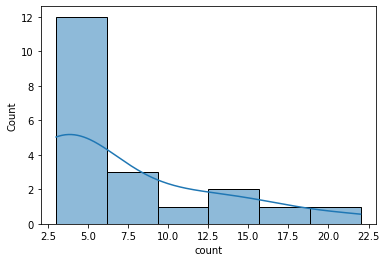

In [34]:
sns.histplot(x='count', data=df_person, kde=True)
 
plt.show()

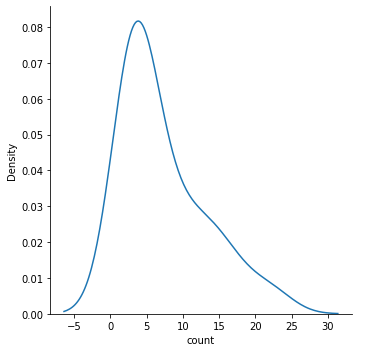

In [35]:
sns.FacetGrid(df_person, height=5) \
   .map(sns.kdeplot, "count") \
   .add_legend()
plt.show()

In [36]:
#extracting Named-Entities for ORG
org_list = []
for ent in tokens.ents:
    if ent.label_ == 'ORG':
        org_list.append(ent.text)
        
org_counts = Counter(org_list).most_common(20)
df_org = pd.DataFrame(org_counts, columns =['text', 'count'])

In [37]:
df_org.head()

,text,count
0,GPE,680
1,CARDINAL,440
2,Microsoft,84
3,LOC,76
4,Karnataka,44


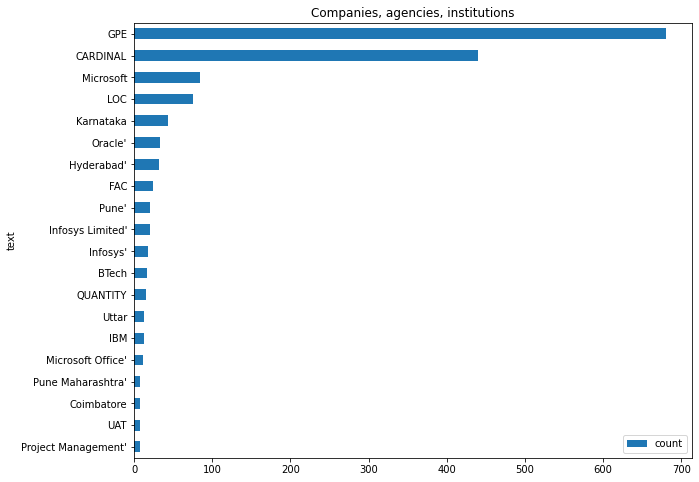

In [38]:
df_org.plot.barh(x='text', y='count', title="Companies, agencies, institutions", figsize=(10,8)).invert_yaxis()


In [39]:
#extracting Named-Entities for GPE
gpe_list = []
for ent in tokens.ents:
    if ent.label_ == 'GPE':
        gpe_list.append(ent.text)
        
gpe_counts = Counter(gpe_list).most_common(20)
df_gpe = pd.DataFrame(gpe_counts, columns =['text', 'count'])

In [40]:
df_gpe.head()

,text,count
0,India,31
1,US,16
2,UK,15
3,Mumbai,11
4,Telangana,7


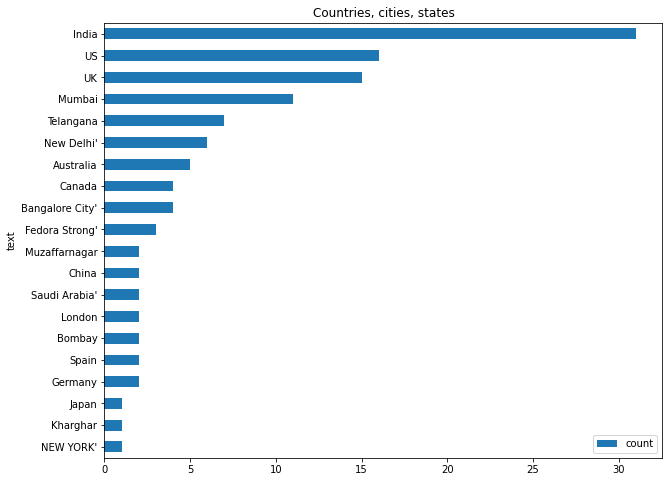

In [41]:
df_gpe.plot.barh(x='text', y='count', title="Countries, cities, states", figsize=(10,8)).invert_yaxis()


In [42]:
#extracting Named-Entities for LANGUAGE
lan_list = []
for ent in tokens.ents:
    if ent.label_ == 'LANGUAGE':
        lan_list.append(ent.text)
        
lan_counts = Counter(lan_list).most_common(20)
df_lan = pd.DataFrame(lan_counts, columns =['text', 'count'])

In [43]:
df_lan.head()

,text,count
0,English,9
1,Shendra,1


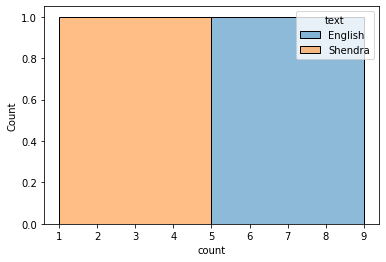

In [44]:
sns.histplot(x='count', data=df_lan, hue='text', kde=True)
 
plt.show()

In [45]:
#extracting Named-Entities for NORP
norp_list = []
for ent in tokens.ents:
    if ent.label_ == 'NORP':
        norp_list.append(ent.text)
        
norp_counts = Counter(norp_list).most_common(20)
df_norp = pd.DataFrame(norp_counts, columns =['text', 'count'])

In [46]:
df_norp.head()

,text,count
0,Bengaluru,61
1,American,3
2,Atlassian,3
3,European,3
4,British,3


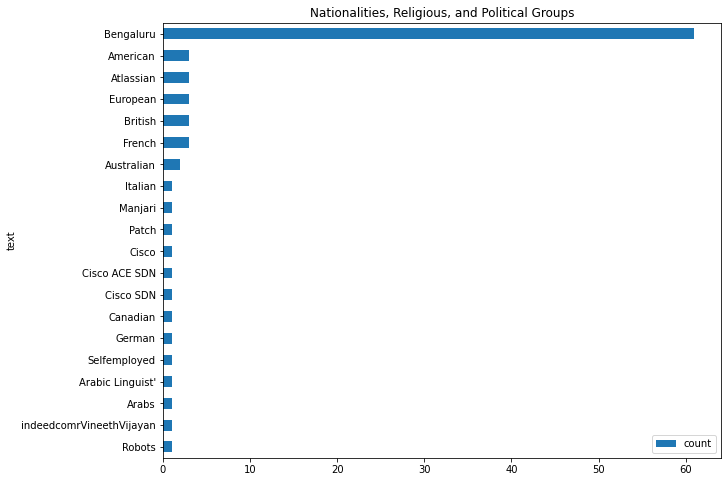

In [47]:
df_norp.plot.barh(x='text', y='count', title="Nationalities, Religious, and Political Groups", figsize=(10,8)).invert_yaxis()

In [48]:
#extracting Named-Entities for PRODUCT
product_list = []
for ent in tokens.ents:
    if ent.label_ == 'PRODUCT':
        product_list.append(ent.text)
        
product_counts = Counter(product_list).most_common(20)
df_product = pd.DataFrame(product_counts, columns =['text', 'count'])

In [49]:
df_product.head()

,text,count
0,Eclipse,6
1,Adobe Flex',1
2,Eclipse FlexBuilder FrameWorks,1
3,SAPUI5 Custom Applications',1
4,Languages VB Scripting',1


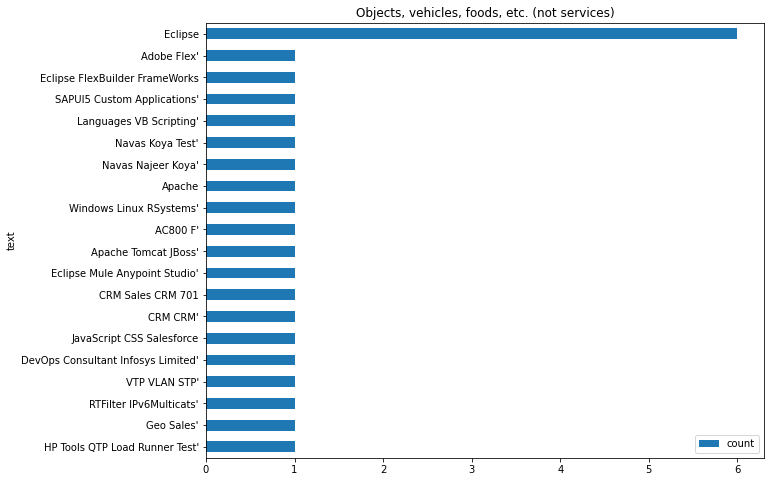

In [50]:
df_product.plot.barh(x='text', y='count', title="Objects, vehicles, foods, etc. (not services)", figsize=(10,8)).invert_yaxis()

In [51]:
#extracting Named-Entities for DATE
date_list = []
for ent in tokens.ents:
    if ent.label_ == 'DATE':
        date_list.append(ent.text)
        
date_counts = Counter(date_list).most_common(20)
df_date = pd.DataFrame(date_counts, columns =['text', 'count'])

In [52]:
df_date.head()

,text,count
0,daily,31
1,'2 years',28
2,'3',28
3,'1 year',25
4,'3 years',23


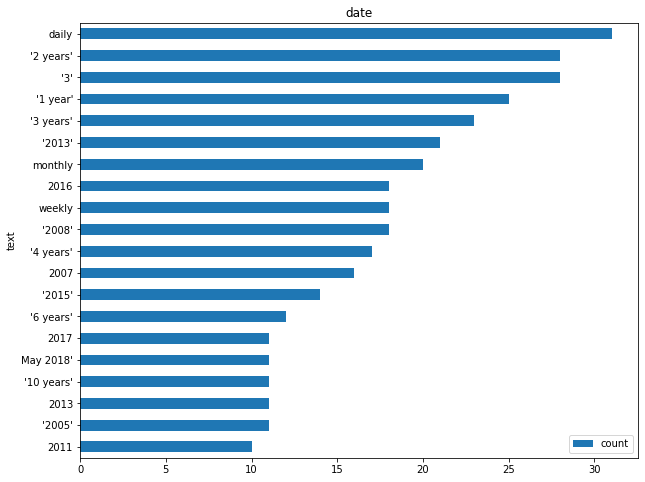

In [53]:
df_date.plot.barh(x='text', y='count', title="date", figsize=(10,8)).invert_yaxis()

## Model training 

In [55]:
pip install spacy[transformers]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
#We only need the text string, the entity start and end indices, and the entity type. 
training_data = []
for example in lst_dics:
  temp_dict = {}
  temp_dict['text'] = example['content']
  temp_dict['entities'] = []
  for annotation in example['annotation']:
    for point in annotation['points']:
      start = point['start']
      end = point['end']
      txt = point['text']
      doc = ner(txt)## display result
      for ent in doc.ents:
        label = ent.label_
    #for lab in annotation['label']:
      #label = lab.upper()

      temp_dict['entities'].append((start, end, label))
  training_data.append(temp_dict)
  
print(training_data[0])

{'text': 'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nhtt

In [57]:
#a sample
training_data

[{'text': 'Govardhana K\nSenior Software Engineer\n\nBengaluru, Karnataka, Karnataka - Email me on Indeed: indeed.com/r/Govardhana-K/\nb2de315d95905b68\n\nTotal IT experience 5 Years 6 Months\nCloud Lending Solutions INC 4 Month • Salesforce Developer\nOracle 5 Years 2 Month • Core Java Developer\nLanguages Core Java, Go Lang\nOracle PL-SQL programming,\nSales Force Developer with APEX.\n\nDesignations & Promotions\n\nWilling to relocate: Anywhere\n\nWORK EXPERIENCE\n\nSenior Software Engineer\n\nCloud Lending Solutions -  Bangalore, Karnataka -\n\nJanuary 2018 to Present\n\nPresent\n\nSenior Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2016 to December 2017\n\nStaff Consultant\n\nOracle -  Bangalore, Karnataka -\n\nJanuary 2014 to October 2016\n\nAssociate Consultant\n\nOracle -  Bangalore, Karnataka -\n\nNovember 2012 to December 2013\n\nEDUCATION\n\nB.E in Computer Science Engineering\n\nAdithya Institute of Technology -  Tamil Nadu\n\nSeptember 2008 to June 2012\n\nht

In [58]:
#We split the data into train/dev set
TRAIN_DATA = training_data[:150]

In [59]:
TEST_DATA = training_data[50:]

In [60]:
nlp = spacy.load("en_core_web_sm")
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [61]:
#we will create the DocBin objects for our training examples for annotatated data
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
train_doc_bin = DocBin() # create a DocBin object
dev_doc_bin = DocBin() # create a DocBin object


In [62]:

for i in TRAIN_DATA:
  print(i['entities'])

[(1749, 1754, 'ORG'), (1696, 1701, 'ORG'), (1417, 1422, 'ORG'), (1356, 1792, 'CARDINAL'), (1209, 1214, 'ORG'), (1136, 1247, 'DATE'), (928, 931, 'DATE'), (858, 888, 'ORG'), (821, 855, 'ORG'), (787, 790, 'DATE'), (744, 749, 'ORG'), (722, 741, 'ORG'), (658, 663, 'ORG'), (640, 655, 'ORG'), (574, 579, 'ORG'), (555, 572, 'ORG'), (470, 492, 'ORG'), (444, 468, 'ORG'), (308, 313, 'ORG'), (234, 239, 'ORG'), (175, 197, 'ORG'), (93, 136, 'ORG'), (39, 47, 'GPE'), (13, 37, 'GPE'), (0, 11, 'PERSON')]
[(2275, 2280, 'ORG'), (2235, 2240, 'ORG'), (1603, 1608, 'ORG'), (667, 702, 'ORG'), (638, 657, 'ORG'), (612, 636, 'ORG'), (591, 610, 'ORG'), (587, 589, 'ORG'), (568, 573, 'ORG'), (526, 535, 'ORG'), (515, 523, 'GPE'), (507, 512, 'ORG'), (491, 502, 'ORG'), (429, 437, 'GPE'), (352, 360, 'GPE'), (296, 304, 'GPE'), (270, 278, 'GPE'), (262, 267, 'ORG'), (246, 257, 'ORG'), (238, 243, 'ORG'), (226, 235, 'ORG'), (177, 206, 'ORG'), (150, 154, 'CARDINAL'), (54, 62, 'GPE'), (43, 51, 'GPE'), (35, 40, 'ORG'), (19, 30, 

In [63]:
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for line in data:
        entities = line['entities']
        text = line['text']
        valid_entities = []
        for start, end, label in entities:
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append([text, {'entities': valid_entities}])

    return cleaned_data

In [64]:
train = trim_entity_spans(TRAIN_DATA)

In [65]:
dev = trim_entity_spans(TEST_DATA)

In [66]:
for line in train:
  line[0] = preprocess_text(line[0], flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)
  print(line)

['govardhana k senior software engineer bengaluru karnataka karnataka email indeed indeedcomrgovardhanak b2de315d95905b68 total experience 5 year 6 month cloud lending solution inc 4 month salesforce developer oracle 5 year 2 month core java developer language core java go lang oracle plsql programming sale force developer apex designation promotion willing relocate anywhere work experience senior software engineer cloud lending solution bangalore karnataka january 2018 present present senior consultant oracle bangalore karnataka november 2016 december 2017 staff consultant oracle bangalore karnataka january 2014 october 2016 associate consultant oracle bangalore karnataka november 2012 december 2013 education computer science engineering adithya institute technology tamil nadu september 2008 june 2012 httpswwwindeedcomrgovardhanakb2de315d95905b68isidrexdownloadikwdownloadtopcoin httpswwwindeedcomrgovardhanakb2de315d95905b68isidrexdownloadikwdownloadtopcoin skill apex le 1 year data st

In [67]:
for e in dev:
  e[0] = preprocess_text(e[0], flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords)
  print(e)

['sai patha mule esb integration developer cisco system hyderabad telangana email indeed indeedcomrsaipatha981ba615ab108e29 6 year professional experience endtoend designing developing implementation software solution area middleware integration j2ee based application expertise area core java servlet 23 jsp web service mesb osb expertise pl sql programming oracle apps oracle order management 25 year experience mule expert mule esb development 37v 38v mule esb administration mule api management api gw 1x 2x 3x cloudhub experience building mule esb api management platform organization experience performance tuning testing benchmarking platform organization expert building middleware system using message routing content enrichment cache mechanism message filtering message transformation message sequencing batch message processing error handling reconciliation mechanism expertise designing implementing multitiered application high performance using j2ee standard good understanding api mana

In [68]:
#we use the method filter_spans to deal with entity span overlaps for the trainig and dev set
from spacy.util import filter_spans

for training_example  in train: 
    text = training_example[0]
    labels = training_example[1]['entities']
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    train_doc_bin.add(doc)


#doc_bin.to_disk("training_data.spacy") # save the docbin object

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

In [69]:
for dev_example  in dev: 
    text = dev_example[0]
    labels = dev_example[1]['entities']
    doc = nlp.make_doc(text) 
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.ents = filtered_ents 
    dev_doc_bin.add(doc)


Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

In [70]:
# Create and save a collection of training docs
#train_docbin = DocBin(docs=train_docs)
train_doc_bin.to_disk("./train.spacy")
# Create and save a collection of evaluation docs
#dev_docbin = DocBin(docs=dev_docs)
dev_doc_bin.to_disk("./dev.spacy")

In [71]:
#we create the config file generated using the quickstart page
!python -m spacy init config ./config.cfg --lang en --pipeline ner --force

2022-12-07 06:05:51.584059: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


### Now we have all that we need to train our model.

In [72]:
!python -m spacy train ./config.cfg --output ./output --paths.train train.spacy --paths.dev dev.spacy

2022-12-07 06:06:04.947774: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2022-12-07 06:06:06,222] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2022-12-07 06:06:06,234] [INFO] Pipeline: ['tok2vec', 'ner']
INFO:spacy:Pipeline: ['tok2vec', 'ner']
[2022-12-07 06:06:06,239] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2022-12-07 06:06:06,240] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2022-12-07 06:06:07,845] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E  

### Let’s load the best-performing model and test it on a piece of text.

In [76]:
nlp_ner = spacy.load("output/model-best")

doc = nlp_ner("dilliraja baskaran tamil nadu email indeed indeedcomrdillirajabaskaran4a3bc8a35879ce5c work experience working infosys developer support infosys may 2015 present experience development project support project education panimalar engineering college skill mainframecoboljcldb2imsdbimsdc httpswwwindeedcomrdillirajabaskaran4a3bc8a35879ce5cisidrexdownloadikwdownloadtopcoin")


spacy.displacy.render(doc, style="ent", jupyter=True)